<a href="https://colab.research.google.com/github/MateusVFronza/Covid19InSantaCatarina/blob/main/CovidSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#fixing a problem to import a lib
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

# Import the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Open the database
  # Coercitive skip in NA cases
dados_bruto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid SC/boavista_covid_dados_abertos.csv',sep = ';', on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# convert to DF
dados = pd.DataFrame(dados_bruto)

In [6]:
# Open data
dados.head() 

,data_publicacao,recuperados,data_inicio_sintomas,data_coleta,sintomas,comorbidades,gestante,internacao,internacao_uti,sexo,...,origem_laboratorio_privado,nom_laboratorio,fez_teste_rapido,fez_pcr,data_internacao,data_entrada_uti,regional_saude,data_evolucao_caso,data_saida_uti,bairro
0,2022-02-27 16:00:07,SIM,2022-01-14,2022-01-14,NaN,NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,LACEN,NAO,SIM,NaN,NaN,GRANDE FLORIANOPOLIS,NaN,NaN,N.I.
1,2022-02-27 16:00:07,SIM,2020-11-17,2020-11-17,NaN,NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,NaN,SIM,NAO,NaN,NaN,FOZ DO RIO ITAJAI,NaN,NaN,FAZENDA
2,2022-02-27 16:00:07,SIM,2020-11-30,2020-12-02,DOR DE GARGANTA,NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,NaN,SIM,NAO,NaN,NaN,SERRA CATARINENSE,NaN,NaN,SAO FRANCISCO
3,2022-02-27 16:00:07,SIM,2020-08-23,2020-08-24,NaN,NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,LACEN,NAO,SIM,NaN,NaN,MEDIO VALE DO ITAJAI,NaN,NaN,NaN
4,2022-02-27 16:00:07,NAO,2022-02-16,IGNORADO,FEBRE,NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,NaN,NAO,NAO,NaN,NaN,OESTE,NaN,NaN,BOM PASTOR


In [7]:
# Description of data 
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614081 entries, 0 to 1614080
Data columns (total 41 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   data_publicacao                    1614081 non-null  object 
 1   recuperados                        1614080 non-null  object 
 2   data_inicio_sintomas               1614080 non-null  object 
 3   data_coleta                        1614080 non-null  object 
 4   sintomas                           1194366 non-null  object 
 5   comorbidades                       41810 non-null    object 
 6   gestante                           977 non-null      object 
 7   internacao                         1614080 non-null  object 
 8   internacao_uti                     1614080 non-null  object 
 9   sexo                               1614080 non-null  object 
 10  municipio                          1614080 non-null  object 
 11  obito                   

Possible error: "1614081 non-null" in first column. It's necessary to investigate




In [8]:
for i in dados.data_publicacao.unique():
  print (i)

2022-02-27 16:00:07
648913411


There's only one date different. It's only 1 row of 1614080 rows, so no problems to drop this.

In [9]:
# observing the wrong line
print(dados.loc[dados['data_publicacao'] == "648913411"]) 


        data_publicacao recuperados data_inicio_sintomas data_coleta sintomas  \
1614080       648913411         NaN                  NaN         NaN      NaN   

        comorbidades gestante internacao internacao_uti sexo  ...  \
1614080          NaN      NaN        NaN            NaN  NaN  ...   

        origem_laboratorio_privado nom_laboratorio fez_teste_rapido  fez_pcr  \
1614080                        NaN             NaN              NaN      NaN   

        data_internacao data_entrada_uti regional_saude  data_evolucao_caso  \
1614080             NaN              NaN            NaN                 NaN   

         data_saida_uti  bairro  
1614080             NaN     NaN  

[1 rows x 41 columns]


In [10]:
# Drop the line
dados.drop([1614080], axis=0, inplace=True)


# Explore

In [11]:
# Counting rows
dados.groupby(['data_publicacao']).count()

,recuperados,data_inicio_sintomas,data_coleta,sintomas,comorbidades,gestante,internacao,internacao_uti,sexo,municipio,...,origem_laboratorio_privado,nom_laboratorio,fez_teste_rapido,fez_pcr,data_internacao,data_entrada_uti,regional_saude,data_evolucao_caso,data_saida_uti,bairro
data_publicacao,,,,,,,,,,,,,,,,,,,,,
2022-02-27 16:00:07,1614080,1614080,1614080,1194366,41810,977,1614080,1614080,1614080,1614080,...,1614080,686703,1614080,1614080,75385,20694,1614079,70922,13731,789495


In [12]:
# Agreggate by 'município', 'recuperados' and 'obitos', counting by 'data publicação'
  # creating a new index, using a range
dados_agg = dados.groupby(['municipio','recuperados','obito'])['data_publicacao'].size().to_frame(name = 'count').reset_index()
dados_agg = pd.DataFrame(dados_agg)
display(dados_agg)

,municipio,recuperados,obito,count
0,ABDON BATISTA,NAO,NAO,19
1,ABDON BATISTA,NAO,SIM,4
2,ABDON BATISTA,SIM,NAO,476
3,ABELARDO LUZ,NAO,NAO,16
4,ABELARDO LUZ,NAO,SIM,67
...,...,...,...,...
874,XAXIM,NAO,SIM,127
875,XAXIM,SIM,NAO,7783
876,ZORTEA,NAO,NAO,25
877,ZORTEA,NAO,SIM,14


In [13]:
# By definition, an active case is a person who is not recovered nor dead
  # To read easily, I've filtered per city
dados_agg.loc[dados_agg.municipio == 'BRUSQUE']

,municipio,recuperados,obito,count
146,BRUSQUE,NAO,NAO,225
147,BRUSQUE,NAO,SIM,348
148,BRUSQUE,SIM,NAO,34807


In [14]:
# Filtering active cases, recuperados (recovered) equals NAO (No) and obito (deaths) also equals NAO (No)
dados_ativos = dados_agg[(dados_agg['recuperados'] == 'NAO')&(dados_agg['obito'] == 'NAO')]
dados_ativos

,municipio,recuperados,obito,count
0,ABDON BATISTA,NAO,NAO,19
3,ABELARDO LUZ,NAO,NAO,16
6,AGROLANDIA,NAO,NAO,12
9,AGRONOMICA,NAO,NAO,19
12,AGUA DOCE,NAO,NAO,60
...,...,...,...,...
864,WITMARSUM,NAO,NAO,12
867,XANXERE,NAO,NAO,161
870,XAVANTINA,NAO,NAO,30
873,XAXIM,NAO,NAO,190


In [15]:
# Sorting by cases & cities
dados_ativos = dados_ativos.sort_values(by=['count', 'municipio'], ascending=False)

In [16]:
dados_ativos.head(10) # top 10 cities with most cases

,municipio,recuperados,obito,count
411,JOINVILLE,NAO,NAO,2429
203,CHAPECO,NAO,NAO,1676
263,FLORIANOPOLIS,NAO,NAO,1609
113,BLUMENAU,NAO,NAO,1167
423,LAGES,NAO,NAO,687
402,JARAGUA DO SUL,NAO,NAO,522
742,SAO JOSE,NAO,NAO,469
227,CRICIUMA,NAO,NAO,410
542,PALHOCA,NAO,NAO,400
739,SAO JOAQUIM,NAO,NAO,327


In [17]:
dados_ativos_top = dados_ativos.head(10) 

# Analysis

In [18]:
# plot
import plotly.express as px

In [19]:
graf = px.bar(dados_ativos_top, 
               x = 'municipio', 
               y = 'count',
              labels={"municipio": "Cities"},
               title = 'The top 10 cities with most active cases in Santa Catarina<br><sup>27 feb. 2022</sup>')
graf.show()


In [20]:
# export 
graf.write_image(file = '/content/drive/MyDrive/Colab Notebooks/Covid SC/Output/top_10_cities_2',
              format = 'png', width=1200, height=700)

### Deaths by *date* in Santa Catarina




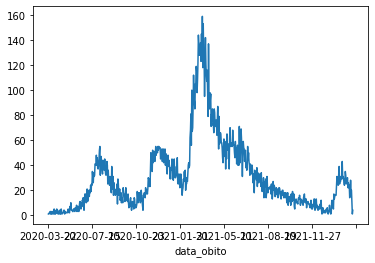

In [21]:
# overview
obitosSC = dados[dados['obito'] == 'SIM'] # filter by deade equal yes
obitosSC.groupby(['data_obito'])['data_publicacao'].count().plot() # counting cases

### Deaths by *age* in Santa Catarina

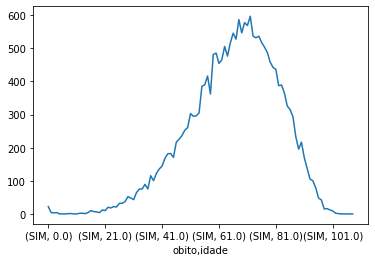

In [22]:
# counting by deaths = yes & age
obitosSC.groupby(['obito','idade'])['data_publicacao'].count().plot()

## Overview: Brusque's case


In [23]:
dadosBrusque = dados.loc[dados.municipio == 'BRUSQUE'] #filter
display(dadosBrusque)

,data_publicacao,recuperados,data_inicio_sintomas,data_coleta,sintomas,comorbidades,gestante,internacao,internacao_uti,sexo,...,origem_laboratorio_privado,nom_laboratorio,fez_teste_rapido,fez_pcr,data_internacao,data_entrada_uti,regional_saude,data_evolucao_caso,data_saida_uti,bairro
17,2022-02-27 16:00:07,SIM,2020-07-13,2020-07-23,"TOSSE, CEFALEIA, CORIZA, DOR DE GARGANTA, FEBR...",NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,LACEN,NAO,SIM,NaN,NaN,MEDIO VALE DO ITAJAI,NaN,NaN,SAO PEDRO
31,2022-02-27 16:00:07,SIM,2020-12-12,2020-12-16,"TOSSE, CEFALEIA, CANSACO, MIALGIA",NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,LACEN,NAO,SIM,NaN,NaN,MEDIO VALE DO ITAJAI,NaN,NaN,SAO LUIZ
111,2022-02-27 16:00:07,SIM,2021-07-01,2021-07-01,DISPNEIA,OBESIDADE,NaN,INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,NaN,NAO,NAO,2021-07-01,NaN,MEDIO VALE DO ITAJAI,2021-07-09,NaN,AGUAS CLARAS
121,2022-02-27 16:00:07,SIM,2020-09-23,2020-09-23,NaN,NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,SIM,LABORATORIO DE ANALISES CLINICAS UNIMED DE BRU...,SIM,SIM,NaN,NaN,MEDIO VALE DO ITAJAI,NaN,NaN,SANTA RITA
208,2022-02-27 16:00:07,SIM,2020-11-15,2020-11-20,"TOSSE, CORIZA",NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,LACEN,NAO,SIM,NaN,NaN,MEDIO VALE DO ITAJAI,NaN,NaN,AZAMBUJA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613828,2022-02-27 16:00:07,SIM,2022-01-24,IGNORADO,"DOR DE GARGANTA, FEBRE",NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,NaN,NAO,NAO,NaN,NaN,MEDIO VALE DO ITAJAI,NaN,NaN,BATEAS
1613829,2022-02-27 16:00:07,SIM,2021-08-12,2021-08-11,NaN,NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,NaN,NAO,NAO,NaN,NaN,MEDIO VALE DO ITAJAI,NaN,NaN,SAO PEDRO
1613833,2022-02-27 16:00:07,SIM,2020-12-22,2020-12-23,FEBRE,NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,NaN,SIM,NAO,NaN,NaN,MEDIO VALE DO ITAJAI,NaN,NaN,AGUAS CLARAS
1613975,2022-02-27 16:00:07,SIM,2022-01-15,IGNORADO,NaN,NaN,NaN,NAO INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,NaN,NAO,NAO,NaN,NaN,MEDIO VALE DO ITAJAI,NaN,NaN,GUARANI


In [24]:
dadosBrusqueObitos = dadosBrusque[dadosBrusque.obito=='SIM'] # filter by deads
dadosBrusqueObitos = pd.DataFrame(dadosBrusqueObitos) # convert as pd
dadosBrusqueObitos.head() # view

,data_publicacao,recuperados,data_inicio_sintomas,data_coleta,sintomas,comorbidades,gestante,internacao,internacao_uti,sexo,...,origem_laboratorio_privado,nom_laboratorio,fez_teste_rapido,fez_pcr,data_internacao,data_entrada_uti,regional_saude,data_evolucao_caso,data_saida_uti,bairro
3367,2022-02-27 16:00:07,NAO,2020-11-26,2020-12-01,"DIARREIA, DISPNEIA, MIALGIA",NaN,NaN,INTERNADO,NAO INTERNADO UTI,FEMININO,...,NAO,LACEN,NAO,SIM,2020-12-11,NaN,MEDIO VALE DO ITAJAI,2020-12-17,NaN,CEDRINHO
4749,2022-02-27 16:00:07,NAO,2021-05-12,2021-05-15,"TOSSE, CEFALEIA, DISPNEIA, DOR DE GARGANTA, FE...",NaN,NaN,INTERNADO,INTERNADO UTI,FEMININO,...,NAO,LACEN,SIM,SIM,2021-05-20,2021-05-23,MEDIO VALE DO ITAJAI,2021-06-06,NaN,AZAMBUJA
10881,2022-02-27 16:00:07,NAO,2020-12-02,2020-12-02,"TOSSE, DISPNEIA, FEBRE","DOENCA CARDIOVASCULAR CRONICA, DIABETES",NaN,INTERNADO,INTERNADO UTI,MASCULINO,...,NAO,NaN,NAO,NAO,2020-12-06,2020-12-06,MEDIO VALE DO ITAJAI,2020-12-09,NaN,SAO LUIZ
11085,2022-02-27 16:00:07,NAO,2020-11-30,2020-11-30,FEBRE,DIABETES,NaN,INTERNADO,INTERNADO UTI,MASCULINO,...,NAO,NaN,SIM,NAO,2020-12-02,2020-12-24,MEDIO VALE DO ITAJAI,2021-01-24,2021-01-24,JARDIM MALUCHE
11938,2022-02-27 16:00:07,NAO,2020-06-30,2020-07-17,"DISPNEIA, FEBRE",NaN,NaN,INTERNADO,INTERNADO UTI,MASCULINO,...,NAO,LACEN,NAO,SIM,2020-07-01,2020-07-06,MEDIO VALE DO ITAJAI,2020-07-19,NaN,AGUAS CLARAS


In [25]:
# total deads in Brusque
print('total de óbitos em Brusque:',dadosBrusqueObitos['data_publicacao'].count())

total de óbitos em Brusque: 348


### Deaths vs. ICU


In [26]:
#Obito x ICU
  # Counting by deaths & entrance in ICU
UTIeObitosBQ = dadosBrusqueObitos.groupby(['sexo','internacao_uti'])['data_publicacao'].count()
UTIeObitosBQ

sexo       internacao_uti   
FEMININO   INTERNADO UTI         94
           NAO INTERNADO UTI     50
MASCULINO  INTERNADO UTI        151
           NAO INTERNADO UTI     53
Name: data_publicacao, dtype: int64

In [27]:
df_UTIeObitosBQ = pd.DataFrame(UTIeObitosBQ) # Convert do pd
df_UTIeObitosBQ = df_UTIeObitosBQ.reset_index() # index 

In [28]:
df_UTIeObitosBQ

,sexo,internacao_uti,data_publicacao
0,FEMININO,INTERNADO UTI,94
1,FEMININO,NAO INTERNADO UTI,50
2,MASCULINO,INTERNADO UTI,151
3,MASCULINO,NAO INTERNADO UTI,53


In [29]:
graf_uti = px.bar(df_UTIeObitosBQ, 
               x = 'sexo', 
               y = 'data_publicacao',
               color = 'internacao_uti',
               labels={"sexo": "Gender", "data_publicacao": "Deaths",'internacao_uti':'Was on ICU?'},
               text_auto=True,
               title = 'A comparation between deaths and entrance in ICU<br><sup>Brusque (SC), 27 feb. 2022</sup>')
#position
graf_uti.update_layout(legend=dict(
    yanchor="auto",
    xanchor="left"))


graf_uti.show()

In [30]:
graf_uti.write_image(file = '/content/drive/MyDrive/Colab Notebooks/Covid SC/Output/brusque_deaths_icu',
              format = 'png', width=1200, height=700)

### Observing the comorbidity

In [31]:
#Deaths x ICU
ComorbidadeBQ = dadosBrusqueObitos.groupby(['comorbidades'])['data_publicacao'].count() # Died in Brusque and had comorbidity
ComorbidadeBQ = pd.DataFrame(ComorbidadeBQ)
ComorbidadeBQ.sum()

data_publicacao    233
dtype: int64

In [32]:
pct_comorbidade = ComorbidadeBQ.sum()/(dadosBrusqueObitos['data_publicacao'].count())*100
pct_comorbidade = round(pct_comorbidade,2)
print(pct_comorbidade) 

data_publicacao    66.95
dtype: float64


66,95% of the people who died in Brusque had some type of comorbidity

### Ages

In [33]:
# Counting deaths by age
dadosBrusqueObitos.groupby(['obito','idade'])['data_publicacao'].count()
dadosBrusqueObitosIdade = pd.DataFrame(dadosBrusqueObitos.groupby(['obito','idade'])['data_publicacao'].count())
dadosBrusqueObitosIdade = dadosBrusqueObitosIdade.reset_index()
dadosBrusqueObitosIdade

,obito,idade,data_publicacao
0,SIM,24.0,1
1,SIM,25.0,1
2,SIM,26.0,2
3,SIM,27.0,1
4,SIM,28.0,2
...,...,...,...
63,SIM,91.0,4
64,SIM,92.0,1
65,SIM,93.0,4
66,SIM,94.0,3


In [34]:
# Ranking deaths by age
dadosBrusqueObitosIdade_ranking = dadosBrusqueObitosIdade.sort_values(by=['data_publicacao', 'idade'], ascending=False)
dadosBrusqueObitosIdade_ranking.rename(columns = {'data_publicacao': 'Contagem'}, inplace = True)
dadosBrusqueObitosIdade_ranking.tail(13)

,obito,idade,Contagem
7,SIM,32.0,2
6,SIM,31.0,2
4,SIM,28.0,2
2,SIM,26.0,2
67,SIM,96.0,1
64,SIM,92.0,1
14,SIM,41.0,1
9,SIM,35.0,1
8,SIM,34.0,1
5,SIM,30.0,1


In [35]:
graf_idade = px.line(dadosBrusqueObitosIdade, 
               x = 'idade', 
               y = 'data_publicacao',
               labels={"idade": "Idades", "data_publicacao": "Óbitos"},
               title = 'Deaths by age<br><sup>Brusque (SC), 27 feb. 2022</sup>')
graf_idade.show()

In [36]:
graf_idade.write_image(file = '/content/drive/MyDrive/Colab Notebooks/Covid SC/Output/brusque_deaths_age',
              format = 'png', width=1200, height=700)